# <strong> A - Importation de modules </strong>

In [1]:
import warnings
warnings.filterwarnings('ignore')

#########################################
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import LatentDirichletAllocation , NMF

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

########################################
import seaborn as sns
#%matplotlib inline
#%matplotlib notebook
sns.set()

#########################################
import csv
from sys import getsizeof

#########################################
import import_ipynb
from P6_01_My_functions_Kengni_zanguim_Brice_062022 import *

#########################################
import nltk
import string
import wordcloud

#########################################
#!pip install pyLDAvis==2.1.2
#!pip install pyLDAvis
import pyLDAvis
from pyLDAvis import gensim as pyLDA_gensim
#import pyLDAvis.graphlab
import gensim
#import pyLDAvis.gensim_models
import pickle
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint
import tqdm


importing Jupyter notebook from P6_01_My_functions_Kengni_zanguim_Brice_062022.ipynb


### <strong> B - Chargement des données </strong>

In [2]:
data = pd.read_csv("data_reviews_legers.csv")
data

,text
0,This was possibly the worst experience I've ev...
1,I've been here a few times with no issues... t...
2,"Would give no stars, called for a cab and it ..."
3,"Despite a recent renovation, the Black Sheep i..."
4,They've yet to get even my most basic of order...
...,...
2134,Extremely disappointed in their lack of servic...
2135,Had such high expectations for this place base...
2136,"As a business owner, I GIVE my honest opinion ..."
2137,Really was craving Chinese and wanted to try t...


# <strong> C - Néttoyage et traitement complet de données </strong>

In [3]:
make_processing_text = True

if make_processing_text :
    data_process = traitement_de_texte(data ,"text", "english", remove_most_frequent= (False , 5), remove_less_frequent=(True , 7), token_min_len= 3,\
                                       complete_stopworld= True)
    if "data_reviews_process.csv" in os.listdir() :
        os.remove("data_reviews_process.csv")    
    data_process.to_csv( "data_reviews_process.csv" ,index = False)
else :
    data_process = pd.read_csv("data_reviews_process.csv")
    data_process.text = data.text.astype("str")

data_process

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kenza\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kenza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kenza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kenza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\kenza\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


,text,Nb_Tokens_uniques,Nb_Tokens
0,worst experience ever restaurant someone minut...,29,52
1,time issue time horrible horrible service,5,7
2,star terrible service tried call service waiti...,10,11
3,waitress table night table night waitress orde...,11,16
4,order right order ask time like service drink ...,9,12
...,...,...,...
2134,service wait hour,4,4
2135,place review look drink back place back like l...,22,29
2136,business owner business money like manager own...,23,31
2137,really try place time try place order time tri...,11,14


In [4]:
len(corpus_frequence(data_process ,  "text"))

106

# <strong> D - Worlds Cloud </strong>

E:\Programmes\Anaconda\envs\OC-projets\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
E:\Programmes\Anaconda\envs\OC-projets\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
E:\Programmes\Anaconda\envs\OC-projets\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
E:\Programmes\Anaconda\envs\OC-projets\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlen

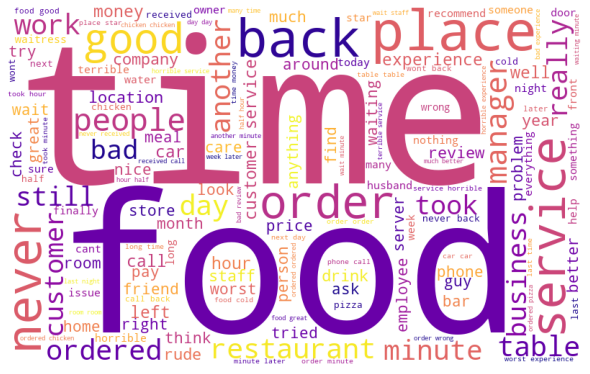

In [5]:
World_cloud_show( data_process , do_mask=False)

# <strong> E - Encodage du texte </strong>

https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/

In [6]:
def document_encoding_algo ( datas, col , model_encoding = "USE" ) :
    data = datas.copy()
    
    if model_encoding == "USE" :
        #!pip3 install --upgrade tensorflow-gpu
        # Install TF-Hub.
        #!pip3 install tensorflow-hub
        import tensorflow as tf
        import tensorflow_hub as hub
        module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
        model_use = hub.load(module_url)
        
        return pd.DataFrame.from_dict( {  f"{k}": np.array(model_use( [data[col][k]] )).reshape(512,) for k in data.index  } , orient='index' )
    elif model_encoding == "TFIDF" :
        tfidf_vect = TfidfVectorizer( ngram_range=(1,4) ,min_df=0.02 )
        tfIdf = tfidf_vect.fit_transform(data[col]).toarray()
        tfIdf =pd.DataFrame(tfIdf, columns= tfidf_vect.get_feature_names())
        return tfIdf
    elif model_encoding == "countvectorizer" :
        count_vect = CountVectorizer()
        out = count_vect.fit_transform(data[col]).toarray()
        out = pd.DataFrame( out , columns=count_vect.get_feature_names())
        return out
    else :
        raise ValueError(f"Le modèle d'encodage \"{model_encoding}\" n'est pas disponible")
        


In [7]:
data_USE = document_encoding_algo( data_process, "text" , "TFIDF" )  

In [8]:
data_USE

,another,anything,around,ask,back,bad,bar,better,business,call,...,week,well,wont,wont back,work,worst,worst ever,worst experience,wrong,year
0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.08423,0.0,0.127143,0.000000,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0
2,0.289567,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.306726,...,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0
4,0.000000,0.0,0.0,0.328294,0.414004,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0
2135,0.000000,0.0,0.0,0.177032,0.223250,0.0,0.195509,0.169993,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0
2136,0.000000,0.0,0.0,0.000000,0.094409,0.0,0.000000,0.000000,0.269271,0.000000,...,0.0,0.135356,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.156068,0.0
2137,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0


# <strong> F - Détection des thèmes relatifs aux avis négatifs </strong>

In [9]:
def corpus_to_tokens( corpus ,col ):
    return corpus[col].apply(lambda sentence : nltk.tokenize.word_tokenize(sentence)).values

def compute_coherence_values(corpus, dictionary,data_lemmatized, k, a, b, score_type = 'c_v'):   #  'u_mass', 'c_v', 'c_uci', 'c_npmi'
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary,num_topics=k,random_state=5, chunksize=200, passes=5, alpha=a, eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, corpus=corpus, texts=data_lemmatized, dictionary=dictionary, coherence = score_type)
    
    return coherence_model_lda.get_coherence()


In [ ]:
def detection_de_themes ( datas, col, Nombre_de_themes = 15, model_topic = "LDA" , model_BOW ="TFIDF" , optimize = True, score_type = 'u_mass') :  #  'u_mass', 'c_v', 'c_uci', 'c_npmi'
    data = datas.copy()
    file_name = "LDA_Hyperparameter_optm.csv"
    if model_topic == "LDA_gensim" : 
        prop = 81
        data = sampling_data( datas = data , proportion = prop )
        
        #  https://github.com/kapadias/mediumposts/blob/master/natural_language_processing/topic_modeling/notebooks/Evaluate%20Topic%20Models.ipynb
        data_lemmatized =  corpus_to_tokens(data, col)
        # Dictionnaires des mots : Mots uniques dans tout le corpus
        id2word = corpora.Dictionary(data_lemmatized)
        # Corpus
        texts = data_lemmatized
        # Term Document Frequency
        corpus = [id2word.doc2bow(text) for text in texts]
        # Optimisation des hyperparamètres du modèle LDA
        
        file_name = f"LDA_optm prop={prop} score={score_type} dict_len={len(id2word)}.csv"
        if optimize :
            # Topics range
            #user_input = input("Interval de sujets : ").split()
            min_topics = 2 #int(user_input[0])
            max_topics = 10 #int(user_input[1])
            topics_range = np.arange(min_topics, max_topics+1)
            
            # Alpha parameter
            #user_input = input("Interval des coefficients alpha  : ").split()
            min_alpha = 0.1 #float(user_input[0])
            max_alpha = 1.  #float(user_input[1])
            alpha = list(np.linspace(min_alpha, max_alpha, 4))
            alpha.append('symmetric')
            alpha.append('asymmetric')
            # Beta parameter
            #user_input = input("Interval des coefficients beta  : ").split()
            min_beta = 0.1 #float(user_input[0])
            max_beta = 1.  #float(user_input[1])
            beta = list(np.linspace(min_beta, max_beta, 4))
            beta.append('symmetric')
            #beta.append('auto')
            
            if file_name not in os.listdir() :
                df = pd.DataFrame( columns=["N_topics","alpha", "beta", f"score_{score_type}"])
                #print('ok1')
            else :
                df = pd.read_csv(file_name)
                #os.remove(file_name)
            for N_top in topics_range :
                for alp in alpha :
                    for bet in beta :
                        #print('ok2')
                        coher = compute_coherence_values( corpus, id2word, data_lemmatized,N_top, alp, bet, score_type )
                        #print('ok3')
                        df0 = pd.DataFrame({"N_topics": N_top ,"alpha":  alp , "beta":  bet , f"score_{score_type}": coher }, index=[1] )
                        #print('ok4')
                        df = df.append(df0, ignore_index=True)
                        #print('ok5')
                    df.to_csv(file_name , index=False)
            del df0
        else :
            df = pd.read_csv( file_name )
            
        # Choix des hyperparamètres optimaux
        maximum = df[ df[f"score_{score_type}"] == df[f"score_{score_type}"].max() ]
        print(maximum)
        Nombre_de_themes , alpha , beta = maximum.iloc[0,0] , maximum.iloc[0,1] , maximum.iloc[0,2]
        if alpha not in [ 'asymmetric', 'symmetric' ] : alpha = float(alpha)
        if beta not in [ 'asymmetric', 'symmetric' ] : beta = float(beta)
        
        # modèle LDA final
        #lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=Nombre_de_themes, random_state=5, chunksize=200, \
        #                                       passes=5, alpha=alpha, eta=beta)
        
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=Nombre_de_themes, random_state=5, chunksize=200, \
                                               passes=5, alpha=alpha, eta=beta)
        
        # Visualisation et interprétation des topics
        pyLDAvis.enable_notebook()
        return pyLDA_gensim.prepare( lda_model, corpus, id2word )
        
        
    elif model_topic == "LDA" :
        data = document_encoding_algo( data, col , model_BOW  )  
        them_model = LatentDirichletAllocation(n_components= Nombre_de_themes,  learning_method="online", n_jobs= -1, batch_size=200,\
                                              mean_change_tol = 1.e-7, max_doc_update_iter= 300).fit(data)
        for idx , theme in enumerate( them_model.components_ ) :
            print(f"Thème N° :{idx}  ")
            print( f'{" ".join([ list(data.columns)[i] for i in theme.argsort()[ : -Nombre_de_themes -1 : -1]  ])} \n')
        return them_model
    elif model_topic =="NMF" :
        data = document_encoding_algo( data, col , model_BOW )  
        them_model = NMF(n_components= Nombre_de_themes, alpha=.1, l1_ratio=.5, init='nndsvd').fit(data)
        
        for idx , theme in enumerate( them_model.components_ ) :
            print(f"Thème N° :{idx}  ")
            print( f'{" ".join([ list(data.columns)[i] for i in theme.argsort()[ : -Nombre_de_themes -1 : -1]  ])} \n')
        
        return them_model

for sc in [ 'c_v', 'c_uci', 'c_npmi'] :
    detection_de_themes( data_process , 'text', 10 , "LDA_gensim" , optimize=True , score_type = sc )  #  'u_mass', 'c_v', 'c_uci', 'c_npmi'

visualize_topic = pyLDAvis.prepare(themes_dist , data_USE.values , data_process.Nb_Tokens , data_USE.columns.values , \
                                   document_encoding_algo(data_process, "text" , "countvevtorizer").sum().values )
pyLDAvis.display(visualize_topic)

In [ ]:
def plot_silhoutte_coef( data , clus_type = "KM") :
    if clus_type =="KM" :
        sil_c_KM = []
        range_cluster = list(range(2,10))
        for n in range_cluster :
            model_KM = sklearn.cluster.MiniBatchKMeans(n,  max_iter=200 , n_init= 40)
            model_KM.fit(data)
            sil_c_KM.append(sklearn.metrics.silhouette_score( data , model_KM.labels_) )

        plt.plot( range_cluster, sil_c_KM )
    elif clus_type =="HC" :
        sil_c_HC = []
        range_cluster = list(range(2,10))
        for n in range_cluster : 
            model_hc = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
            model_hc.fit(data)
            sil_c_HC.append(sklearn.metrics.silhouette_score( data , model_hc.labels_) )

        plt.plot( range_cluster, sil_c_HC )

In [ ]:
plot_silhoutte_coef(data_USE, "KM")

In [ ]:
plot_silhoutte_coef(data_USE, "HC")

sil_c_DBSCAN = []
range_cluster = np.linspace(0.1,4,15)
for n in range_cluster : 
    model_DBSCAN = sklearn.cluster.DBSCAN( eps= n , min_samples= 20 , n_jobs=os.cpu_count() )
    model_DBSCAN.fit(data_USE)
    sil_c_DBSCAN.append( len(model_DBSCAN.labels_))  #sil_c_DBSCAN.append(sklearn.metrics.silhouette_score( data_USE , model_DBSCAN.labels_) )
    
plt.plot( range_cluster, sil_c_DBSCAN )

In [ ]:
hyerarchical_clustering(data_USE,link_criterios = "ward", profondeur = 4 )

In [ ]:
model_cluster = clustering_model_choice(data_USE , 2 , "km")

In [ ]:
for  lab in np.unique( model_cluster.labels_ ) :
    World_cloud_show( data_process[ model_cluster.labels_ == lab ] , (10 , 2) , 180 , do_mask = False )

In [ ]:
TSNE_plot(data_USE , model_cluster, perplx= 40, transp=0.4 )